<a href="https://colab.research.google.com/github/Dokuqui/FakeOutDetector/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import os
import numpy as np

base_dir = '/content/drive/MyDrive/FakeOutDetector/data'
real_dir = os.path.join(base_dir, 'real')
fake_dir = os.path.join(base_dir, 'fake')
processed_base = os.path.join(base_dir, 'processed')
processed_real = os.path.join(processed_base, 'real')
processed_fake = os.path.join(processed_base, 'fake')

os.makedirs(processed_real, exist_ok=True)
os.makedirs(processed_fake, exist_ok=True)

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def crop_face(img_path, output_path):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load {img_path}")
        return
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    if len(faces) > 0:
        x, y, w, h = faces[0]  # Take the first detected face
        face = img[y:y+h, x:x+w]
        cv2.imwrite(output_path, face)
    else:
        print(f"No face detected in {img_path}, saving original")
        cv2.imwrite(output_path, img)

# Process real images
for i in range(50):
    crop_face(os.path.join(real_dir, f'real_{i}.jpg'), os.path.join(processed_real, f'real_{i}.jpg'))

# Process fake images
for i in range(50):
    crop_face(os.path.join(fake_dir, f'fake_{i}.jpg'), os.path.join(processed_fake, f'fake_{i}.jpg'))

No face detected in /content/drive/MyDrive/FakeOutDetector/data/real/real_23.jpg, saving original
No face detected in /content/drive/MyDrive/FakeOutDetector/data/fake/fake_1.jpg, saving original
No face detected in /content/drive/MyDrive/FakeOutDetector/data/fake/fake_7.jpg, saving original
No face detected in /content/drive/MyDrive/FakeOutDetector/data/fake/fake_19.jpg, saving original
No face detected in /content/drive/MyDrive/FakeOutDetector/data/fake/fake_32.jpg, saving original
No face detected in /content/drive/MyDrive/FakeOutDetector/data/fake/fake_40.jpg, saving original


In [3]:
def preprocess_image(input_path, output_path, size=(224, 224)):
    img = cv2.imread(input_path)
    if img is None:
        print(f"Failed to load {input_path}")
        return
    img_resized = cv2.resize(img, size, interpolation=cv2.INTER_AREA)
    img_normalized = img_resized / 255.0  # Normalize to 0-1
    cv2.imwrite(output_path, img_normalized * 255)  # Save as 0-255 for .jpg compatibility

# Process real
for i in range(50):
    preprocess_image(os.path.join(processed_real, f'real_{i}.jpg'), os.path.join(processed_real, f'real_{i}.jpg'))

# Process fake
for i in range(50):
    preprocess_image(os.path.join(processed_fake, f'fake_{i}.jpg'), os.path.join(processed_fake, f'fake_{i}.jpg'))

Processed real_0.jpg:


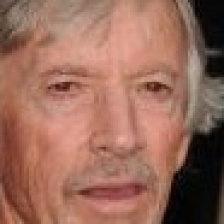

Processed fake_0.jpg:


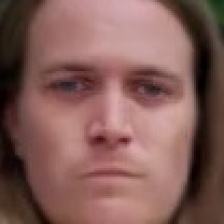

In [4]:
from google.colab.patches import cv2_imshow

real_img = cv2.imread(os.path.join(processed_real, 'real_0.jpg'))
fake_img = cv2.imread(os.path.join(processed_fake, 'fake_0.jpg'))

print("Processed real_0.jpg:")
cv2_imshow(real_img)
print("Processed fake_0.jpg:")
cv2_imshow(fake_img)